In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Transfection efficiency (Extended Data Figure 4a,b,c)

In [2]:
dats = pd.read_excel("data/transfection_efficiency.xlsx", sheet_name=None, index_col=0)

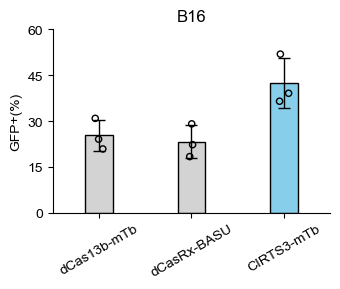

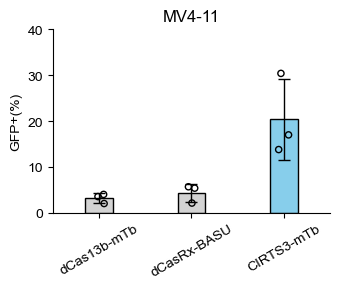

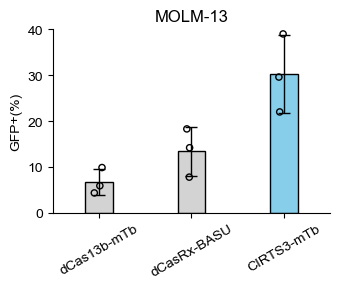

In [5]:
N = 0
ylims = [60, 40, 40]
yticks_list = [
    [0, 15, 30, 45, 60],
    [0, 10, 20, 30, 40],
    [0, 10, 20, 30, 40],
]

for n, (name, dat) in enumerate(dats.items()):
    # print(name)
    
    means = dat.mean(axis=1)
    stds = dat.std(axis=1)
    xs = np.arange(len(means))
    w = 0.3
    # ylim = (int(np.max(dat.values) / 10) + 1) * 10
    ylim = ylims[n]
    colors = ["lightgrey", "lightgrey", "skyblue", "skyblue"]
    
    plt.figure(figsize=(3.5, 3))
    plt.title(name)
    plt.bar(xs, means, yerr=stds, error_kw=dict(capsize=4, lw=1), width=w, edgecolor="black", color=colors)

    if True:
        w1 = w * 0.4
        for i in np.arange(len(dat)):
            xs1 = i + (np.random.rand(len(dat.columns)) - 0.5) * w1
            ys1 = dat.values[i]
            plt.scatter(xs1, ys1, s=20, zorder=10, edgecolor="black", color="none")

    if False:
        w2 = w/2
        for i in range(1, 4):
            vs1 = dat.values[0]
            vs2 = dat.values[i]
            pval = ttest_ind(vs1, vs2)[1]
            x1, x2 = 0 - w2, i + w2
            x3 = (x1 + x2) / 2
            y = 1.8 + (i - 1) * 0.4
            plt.plot([x1, x2], [y, y], lw=1, color="black")
            plt.text(x3, y + 0.05, "%.1e" % pval, ha="center", va="bottom")

    # plt.yticks([0, 3, 6, 9, 12, 15])
    plt.yticks(yticks_list[n])
    plt.xticks(xs, dat.index, rotation=30)
    plt.ylabel("GFP+(%)")
    plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
    plt.ylim(0, ylim)
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.tight_layout()
    plt.savefig("figures/transfection_efficiency.%s.pdf" % name)
    plt.show()
    plt.close()